<font color='red'> 
# Computational Statistics for Data Analysis
<font\>

# Index

### 3 Probabilities. 
* 3.1 Probability rules
* 3.2 Monte Carlo
* 3.3 Continuous distribution
* 3.4 Central limit Theorem
* 3.5 Kernel density  (optional)

### 4 Estimation
* 4.1 Sample mean
* 4.2 Variance
* 4.3 Standard scores
* 4.4 Covariance (optional)
* 4.5 Pearson's correlation
* 4.6 Spearman's rank correlation
 
### 5 References



<font color='blue'>
## 3 Probabilities  (frequentist point of view). 
* 3.1 Probability rules
* 3.2 Monte Carlo
* 3.3 Continuous distribution
* 3.4 Central limit Theorem
* 3.5 Kernel density
<font\>

The most common definition of **probability** is a *frequency expressed as a fraction* of the universe of possible outcomes. 

    Thus, it is a real value between 0 and 1 that is intended to be a measure corresponding to the idea that some things are more likely than others.

The *things* we assign probabilities are called **events**, $E$.  A *situation* where $E$ might or might not happen is called a **trial**.

   In the case of a six-sided die, each roll is called a **trial**. If we want to compute $P(6)$, each time a 6 appears is called a **success**. Other trials are called **failures**. 

If in a *finite series of $n$ identical trials* we observe $s$ successes, the **probability of the success** is $s/n$.



## 3.1 Probability Rules 

A rule that is not always true: $P(A \mbox{ and } B) = P(A) P(B)$. 

It is true, when $A$ and $B$ are **independent**. 
$A$ and $B$ are **independent** if the fact that $A$ occurred, does not change the probability of $B$ and viceversa. Trials corresponding to tossing a coin are independent. 

A rule that is true when $A$ and $B$ are **not independent**: 

$$ P(A|B) = \frac{P(A \mbox{ and } B)}{P(B)}$$

From that we can derive: 

$$P(A \mbox{ and } B) = P(A) P(B|A) = P(B) P(A|B)$$

**Exercises**: 

+ If I have two children and we know that at least one of them is a girl, what is the probability that they are two girls?
+ If I have two children and we know that the older one is a girl, what is the probability that they are two girls?

In [1]:
## Your solutions
1/3
1/2

### More probability rules

We say that two events are **mutually exclusive** if:

$$ P(A | B) = P(B | A) = 0 $$

In this case it is easy to show that:

$$ P(A \mbox{ or } B) = P(A) + P(B)$$

If $A$ and $B$ are not mutually exclusive:

$$ P(A \mbox{ or } B) = P(A) + P(B) - P(A \mbox{ and } B) $$

**Exercises**: Counting is the most basic skill to solve probability problems.

+ Q: If I roll two dice and the total is 8, what is the probability that one of the dice is 6?
+ Q: If I roll 100 dice, what is the probability of getting all sixes? 
+ Q: What is the probability of getting no sixes?
+ Q: What is the probability of getting at least one six?
+ Q: If I have two children, what is the probability that they are two girls?

In [3]:
#Your solution here
2/5
1/6**100
(5/6)**100
1-(5/6)**100
1/4

0.25

## 3.2 Binomial distribution

More generally, the probability distribution that represents the probability of getting $k$ times a success with probability $p$ in $n$ trials is:

$$ PMF(k) = {n \choose k} p^k (1-p)^{(n-k)}$$

where ${n \choose k} = \frac{n!}{k!(n-k)!}$. This is called **binomial distribution**.

What is the probability of having 2 successes in 5 trials?

In [1]:
import scipy.misc as sc
n = 5
k = 2
print(sc.comb(n, k, exact=True)) # Chances of 2 successes in 5 trials
print(sc.comb(n, k, exact=True)*1/2**2*(1-1/2)**3) # Chances of 2 successes in 5 trials

10
0.3125



What is the probability of having 5 heads in 9 trials?

In [2]:
# chances of 5 heads in 9 tosses

a = sc.comb(9, 5, exact=True)
print('The combinations of 9 on 5 are: ', a)

The combinations of 9 on 5 are:  126


In [7]:
print(2**9)
print(2**5)

512
32


In [8]:
p = 0.5
print('Prob: ', a * p**5 * (1-p)**4)

Prob:  0.24609375


What is the probability of having 6 sixes in 9 trials?

In [9]:
#  Your solution here
a = sc.comb(9, 6, exact=True)
print('The combinations of 9 on 6 are: ', a)
p = 1/6.0
print('Prob: ', a * p**6 * (1-p)**3)

The combinations of 9 on 6 are:  84
Prob:  0.0010419048163389725


## 3.3 Monte Carlo Experiments

**Monte Carlo experiments** are a broad class of computational algorithms that rely on *repeated random sampling to obtain numerical results*. Typically, one runs simulations many times over and over in order to obtain the distribution of an unknown probabilistic entity. (*Source: Wikipedia*)

**Trivial case**: What are the chances of getting a six in one trial?

In [17]:
import random
import sys
N = 10000 # perform N experiments
M = 0 # number of times, we got 6
for i in range(N):
    outcome = random.randint(1, 6)
    if outcome == 6:
        M += 1
Prob=M/float(N)
print('I got six %d times out of %d' % (M, N), '; Prob = ', 
      Prob, 'Note that: 1/6=', 1/6.0)

I got six 1682 times out of 10000 ; Prob =  0.1682 Note that: 1/6= 0.16666666666666666


In [18]:
a=sc.comb(1,1, exact=True)
p=a*(1/6**1)*(5/6)**(1-1)
print(p)

0.16666666666666666


What are the chances of getting a six in two trials?

In [19]:
#  chances of (exactly) 1 six in 2 trials

a = sc.comb(2, 1, exact=True)
p = 1/6.0
print('Prob: ', a * p * (1-p))

Prob:  0.2777777777777778


In [22]:
N = 10000 # perform N experiments
M = 0 # no of times we get one 6
for i in range(N):
    outcome1 = random.randint(1, 6)
    outcome2 = random.randint(1, 6)
    if (outcome1 == 6 and outcome2 !=6) or (outcome1 != 6 and outcome2 == 6):
        M += 1
print('I got one six %d times out of %d' % (M, N), 
      '; Prob = ', float(M)/N)

I got one six 2772 times out of 10000 ; Prob =  0.2772


**Exercise**: You throw two dice, one black and one red. What is the probability
that the number of eyes on the black die is larger than the number of
eyes on the red die?

In [23]:
# Your solution here
N = 100000 # perform N experiments
M = 0 # no of times we get one 6
for i in range(N):
    outcome_black = random.randint(1, 6)
    outcome_red = random.randint(1, 6)
    if (outcome_black >outcome_red):
        M += 1
print('I got one six %d times out of %d' % (M, N), 
      '; Prob = ', float(M)/N)

I got one six 41615 times out of 100000 ; Prob =  0.41615


**A more interesting case:** If I roll a dice 100 times, what is the chance of getting at least 6 sixes in a row?

In [2]:
import random
# Your solution here
N = 10000 # perform N experiments
M = 100 # no of times we get one 6
mystring=''
outcome=0
for i in range(N):
    for i in range(M):
        mystring = mystring+str(random.randint(1, 6))
    if ('666666' in mystring):
        outcome +=1
print(float(outcome)/N)
        #print('I got one six %d times out of %d' % (M, N),       '; Prob = ', float(M)/N)

0.9739


**Exercise**: What is the probability that Messi scores at least 1 goal in a row of 10 matches during a season? (Let's suppose that each match is an independent trial).

**Data**: Messi scores 0.83 goals per match (323 goals in 387 matches) and CR4 scores 0.62 (329 goals in 527 matches) goals per match.
There are 42 matches in a season. 

<small>(Source: https://es.answers.yahoo.com/question/index?qid=20130928103148AAFQHsC)</small>

In [53]:
# Your solution here

N = 10000 # perform N experiments
M = 42 # matches season
success='111111111'
outcome=0
Messi_score=0.83
Cristiano_score=0.62
for i in range(N):
    season=''
    for i in range(M):
        trial=random.random()
        if trial<Cristiano_score:
            season=season+'1'
        else: season=season+'0'
        
    if (success in season):
        outcome +=1
print('Cristiano gets at least 1 goal in a row of 10 matches with probability %.2f', float(outcome)/N)
    

Cristiano gets at least 1 goal in a row of 10 matches with probability %.2f 0.1749


## 3.4 Continous distributions

So far, we have built **empirical distributions** (which represent the distributions of values in a sample), based on observations, but many real problems are well approximated by fitting **continous distributions functions (CDF)**. 

They are called in this way because the distribution is described by an analytic continuous function.

### 3.4.1 The exponential distribution

The CDF of the exponential distribution is:

$$ CDF(x) = 1 -  \exp^{- \lambda x}$$ 

And its PDF is:

$$ PDF(x) = \lambda \exp^{- \lambda x}$$

The parameter $\lambda$ determines the shape of the distribution, the mean of the distribution is $1/\lambda$ and its variance is $1/\lambda^2$. The median is $ln(2)/\lambda$.

In real applications, exponential distributions appear when we have a series of events and estimate the events times, called *interarrival* times. When the events are equally likely to occur at any time, the interarrival times distribution used to get exponential distribution.

As an example, the following figure shows the CDF of the interarrival times of birth in an Australian hospital. 44 births were registered in 24 hours, so the rate is $\lambda=0.0306$ births/minute. The mean of the exponential distribution is $1/\lambda$, so the mean time between births is 32.7 minutes. How do you get them?

In [54]:
# Your solution here

print(44/(24*60))
print(24*60/44)

0.030555555555555555
32.72727272727273


<center><img src='images/interarrivaltimes.png'></center>

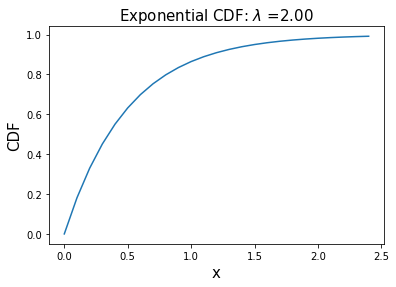

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

l = 2
x=np.arange(0,2.5,0.1)
y= 1 - np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential CDF: $\lambda$ =%.2f' % l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

Visualize the CDF of the Australian birhts.

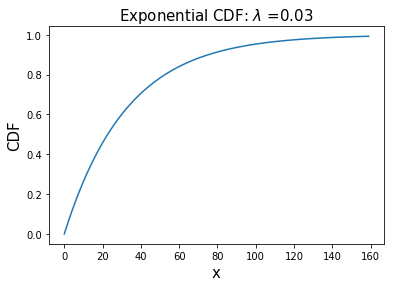

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

l = 44/(24*60)
x=np.arange(0,160,1)
y= 1 - np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential CDF: $\lambda$ =%.2f' % l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

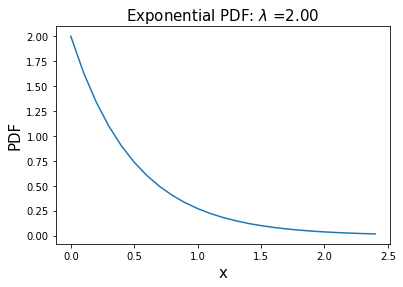

In [14]:
from __future__ import division
import numpy as np
import scipy.stats as stats

l = 2
x=np.arange(0,2.5,0.1)
y= l * np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential PDF: $\lambda$ =%.2f' % l, fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

There are a lot of real world events that can be described with this distribution.
* The time until a radioactive particle decays,
* The time it takes before your next telephone call,
* The time until default (on payment to company debt holders) in reduced form credit risk modeling.

Give another example. 
- Birthdays

The random variable $X$ of the lifelengths of some batteries is associated with a probability density function of the form:

$$ PDF(x) = \frac{1}{4} \exp^{- \frac{x}{4}}$$ 

In [ ]:
l = 0.25
x=np.arange(0,25,0.1)
y= l * np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential: $\lambda$ =%.2f' % l ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('PDF',fontsize=15)
plt.show()

### 3.4.2 The normal distribution

The **normal, or Gaussian distribution** is the most used one because it describes a lot of phenomena and because it is amenable for analysis. 

Its CDF has no closed-form expression and its more common representation is the PDF:

$$ PDF(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2} \right)$$


In [ ]:
u=5 # mean
s=1 # standard deviation
x=np.arange(0,15,0.1)
y=(1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,y,'-')
plt.title('Gaussian PDF: $\mu$=%.1f, $\sigma$=%.1f' % (u,s),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

Examples:
    * Measures of size of living tissue (length, height, skin area, weight);
    * The length of inert appendages (hair, claws, nails, teeth) of biological specimens, in the direction of growth; presumably the thickness of tree bark also falls under this category;
    * Certain physiological measurements, such as blood pressure of adult humans.


There exist much more distributions as: 
- the Pareto distribution (describing e.g. the distribution of wealth, cities sizes, sand particles, forest fires and earthquakes,
- the lognormal distribution (describing the adult weights), etc.


### 3.5 Central Limit Theorem

The normal distribution is also important, because it is involved in the Central Limit Theorem:

> Take the mean of $n$ random samples from ANY arbitrary distribution with a $well$ $defined$ standard deviation $\sigma$ and mean $\mu$. As $n$ gets bigger the **distribution of the sample mean** will always converge to a Gaussian (normal) distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

Colloquially speaking, the theorem states the distribution of an average tends to be normal, even when the distribution from which the average is computed is decidedly non-normal. This explains the ubiquity of the Gaussian distribution in science and statistics. 

#### Example: Uniform Distribution

The uniform distribution is obviously non-normal.  Let's call it the $parent$ $distribution$.

To compute an average, two samples are drawn ($n=2$), at random, from the parent distribution and averaged. Then another sample of two is drawn and another value of the average computed.  This process is repeated, over and over, and averages of two are computed.  

Repeatedly taking more elements ($n = 3,4...$) from the parent distribution, and computing the averages, produces a normal probability density.

In [ ]:
fig, ax = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(11, 5))
x = np.linspace(0, 1, 100)
for i in range(4):
    f = np.mean(np.random.random((10000, i+1)), 1)
    m, s = np.mean(f), np.std(f, ddof=1)
    fn = (1/(s*np.sqrt(2*np.pi)))*np.exp(-(x-m)**2/(2*s**2))  # normal pdf            
    ax[i].hist(f, 40, normed=True, color=[0, 0.2, .8, .6]) 
    ax[i].set_title('n=%d' %(i+1))
    ax[i].plot(x, fn, color=[1, 0, 0, .6], linewidth=10)
    
plt.suptitle('Demonstration of the central limit theorem for a uniform distribution', y=1.05)
plt.show()

The Central Limit Theorem explains the importance of normal distributions in the real world. Many features and properties of the living beings depend on genetic and environmental factors which effect usually is additive. The measured features are sum of manny small effects that not necessarily follow the normal distributions, but their sum does follow according to the Central Limit Theorem.

## 3.6 Kernel density estimates 

In some instances, we may not be interested in the parameters of a particular distribution of data, but just a **continous representation** of the data at hand. In this case, we can estimate the distribution non-parametrically (i.e. making no assumptions about the form of the underlying distribution) using kernel density estimation.

Several uses are defined:

- Visualization - to explore the data by visualizing them and decide whether an estimated PDF is an appropriate model for the distribution.

- Interpolation - if we have reasons to beleive that the distribution is smooth, we can apply the KDE to interpolate the density specially for values that were not sampled.

- Simulation - specially when the sample distribution is small, it would be convenient to smooth the sample distribution by KDE in order to simulated and explore more possible outcomes, rather than replicating the observed data.

In [ ]:
from scipy.stats.distributions import norm

# Some random data
y = np.random.random(15) * 10
x = np.linspace(0, 10, 100)
# Smoothing parameter
s = 0.4

# Calculate the kernels
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])

plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1))
plt.plot(y, np.zeros(len(y)), 'ro', ms=10)

SciPy implements a Gaussian KDE that automatically chooses an appropriate bandwidth. Let's create a bi-modal distribution of data that is not easily summarized by a parametric distribution:

In [ ]:
# Create a bi-modal distribution with a mixture of Normals.
x1 = np.random.normal(0, 3, 100) # parameters: (loc=0.0, scale=1.0, size=None)
x2 = np.random.normal(8, 1, 50)

# Append by row
x = np.r_[x1, x2] # r_ Translates slice objects to concatenation along the first axis.


In [ ]:
plt.hist(x, bins=8, normed=True)

In [ ]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=18, normed=True)
plt.plot(xgrid, density(xgrid), 'r-')

<font color='blue'>
## 4 Estimation
* 4.1 Sample mean
* 4.2 Variance
* 4.3 Standard scores
* 4.4 Covariance
* 4.5 Pearson,s correlation
* 4.6 Spearman's rank correlation
<font\> 


Let's think of a sequence of values: 
[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138].

Can you guess which is the distribution? For example what would be its mean?

Hint: assume that it is normal distribution.


**Definition:** *Estimation* is the process of inferring the parameters (e.g. mean) of a distribution from a statistic of samples drown from a population.

For example: What is the estimated mean $\hat{\mu}$ of the following normal data?

In [ ]:
x = np.random.normal(0.0, 1.0, 10000)
a = plt.hist(x,50,normed='True')

We can use our definition of empirical mean:

In [ ]:
print('The empirical mean of the sample is ', x.mean())

Let us imagine that we were reported the following data, where probably one of the data is wrong:
    

In [ ]:
x=np.array([-0.441, 1.774, -0.101, -1.138, 2.975, -213.8])
print('The mean is: ', x.mean())

Is the mean estimator good enough?

### 4.1 Sample mean

+ The process is called **estimation** and the statistic we used **estimator**.

+ The median is also an estimator (more robust to outliers). 

+ "Is median better than sample mean?" is a question with at least two different answers. We can use two different objectives to answer this question: the minimization of error or the maximization to get the right answer. 

+ If there are no outliers, we can use the **sample mean** to minimize **mean squared error** (where $m$ is the number of times you play the estimation game, not the size of the sample!):

$$ MSE = \frac{1}{m} \sum(\hat{\mu} - \mu)^2$$




In [ ]:
err = 0.0
mu=0.0
NTests=1000
var=1.0
NPoints=100000
for i in range(NTests):
    x = np.random.normal(mu, var, NPoints)
    err += (mu - x.mean())**2

print('MSE: ', err/float(NTests) )

### 4.2 Variance

We can also estimate the variance with:

$$ \hat{\sigma}^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

This estimator works for large samples, but it is biased for small samples. We can use this one:

$$ \hat{\sigma}^2_{n-1} = \frac{1}{n-1} \sum_i (x_i - \mu)^2 $$


### 4.3 Other concepts: Standard scores

$$ z_i = \frac{x_i - \mu}{\sigma}$$

This measure is dimensionless and its distribution has mean 0 and variance 1.

It inherits the "shape" of $X$: if it is normally distributed, so is $Z$. If $X$ is skewed, so is $Z$.

### 4.4 Covariance (optional)

Sometimes it would be of interest to measure the relationship between two variables. 

**Covariance** is a measure of the tendency of two variables to vary together. 

If we have two series $X$ and $Y$ with $X=\{x_i\}$ and $Y=\{y_i\}$, and they vary together, their deviations $x_i - \mu_X$ and $y_i - \mu_Y$ tend to have the same sign.

If we multiply them together, the product is positive, when the deviations have the same sign, and negative, when they have the opposite sign. So adding up the products gives a measure of the tendency to vary together.

Covariance is the mean of the products:

$$ Cov(X,Y) = \frac{1}{n} \sum (x_i - \mu_X)*(y_i - \mu_Y), $$

where $n$ is the length of the two series.

It is a measure that is difficult to interpret.

In [ ]:
def Cov(X, Y):
    def _get_dvis(V):
        return [v - np.mean(V) for v in V]
    dxis = _get_dvis(X)
    dyis = _get_dvis(Y)
    return np.sum([x * y for x, y in zip(dxis, dyis)])/len(X)

X = [5, -1, 3.3, 2.7, 12.2]
Y=[10,12,8,9,11]

print("Cov(X, X) = %.2f" % Cov(X, X))
print("Var(X) = %.2f" % np.var(X))

print("Cov(X, Y) = %.2f" % Cov(X, Y))


<center><img src="images/gasolineprice.gif"></center>

### 4.5 Pearson's Correlation

Shell we take into account the variance? An alternative is to divide the deviations by $\sigma$, which yields standard scores, and compute the product of standard scores:

$$ p_i = \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y} $$
 
The mean of these products is:

$$ \rho = \frac{1}{n} \sum p_i = \frac{1}{n} \sum  \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y}  $$

Or we can rewrite $\rho$ by factoring out $\sigma_X$ and $\sigma_Y$:

$$ \rho = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

 


In [ ]:
def Corr(X, Y):
    assert len(X) == len(Y)
    return Cov(X, Y) / np.prod([np.std(V) for V in [X, Y]])

print("Corr(X, X) = %.5f" % Corr(X, X))

Y=np.random.random(len(X))

print("Corr(X, Y) = %.5f" % Corr(X, Y))

<center><img src="images/pearson.png"></center>

When $\rho = 0$, we cannot say that there is no relationship between the variables!

Pearson's coefficient only measures **linear** correlations!

### 4.6 Spearman’s rank correlation

Pearson’s correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of **outliers**.

Spearman’s rank correlation is an alternative that mitigates the effect of outliers and skewed distributions. To compute Spearman’s correlation, we have to compute the rank of each value, which is its index in the sorted sample. 

For example, in the sample {7, 1, 2, 5} the rank of the value 5 is 3, because it appears third if we sort the elements. 

Then, we compute the Pearson’s correlation, **but for the ranks**.

In [ ]:
def list2rank(l):
    #l is a list of numbers
    # returns a list of 1-based index; mean when multiple instances
    return [np.mean([i+1 for i, sorted_el in enumerate(sorted(l)) if sorted_el == el]) for el in l]

l = [7, 1, 2, 5]
print("ranks: ", list2rank(l))

def spearmanRank(X, Y):
    # X and Y are same-length lists
    return Corr(list2rank(X), list2rank(Y))

X = [1, 2, 3, 4, 100]
Y = [5, -100, 7, 10, 9]
plt.plot(X,'ro')
plt.plot(Y,'go')

print("Pearson rank coefficient: %.2f" % Corr(X, Y))
print("Spearman rank coefficient: %.2f" % spearmanRank(X, Y))



**Exercise:** Obtain for the Anscombe's quartet, the different estimators (mean, variance, covariance for each pair, Pearson's correlation and Spearman's rank correlation.

(Source: http://en.wikipedia.org/wiki/Anscombe's_quartet):

<center><img src="images/Anscombe's_quartet.png"></center>

In [ ]:
#Your solution here.


**Exercice:** Show if there is a correlation between the data of the babies....

In [ ]:
#Your solution here.

### 5. Main reference
*Think Stats: Probability and Statistics for Programmers*, by Allen B. Downey, published by O'Reilly Media.
http://www.greenteapress.com/thinkstats/